In [2]:
%matplotlib inline
import numpy as np
import network_generation.generation as ng
import matplotlib.pyplot as plt
import experiment as ex
import time 

# PARAMS 
kappa, n, d = 10, 1000, 2

50
9.95736
0.0563785756885
0.000246382424092


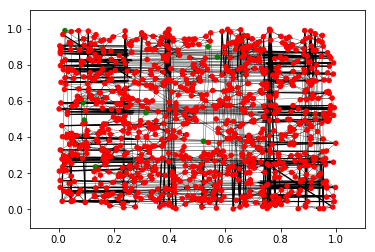

In [3]:
## PERIODIC  
RGGp = ng.RGGEnsemble(kappa, n, d,boundary='p',num_radii=10)
RGGp.generate_samples(n=50)
RGGp.samples[0].plot_network(unmatched = RGGp.samples[0].find_unmatched())
print RGGp.get_num_samples()
print np.mean([sample.mean_degree() for sample in RGGp.samples])
print RGGp.radius
print RGGp.radius_std

stddev: 0.125321627822


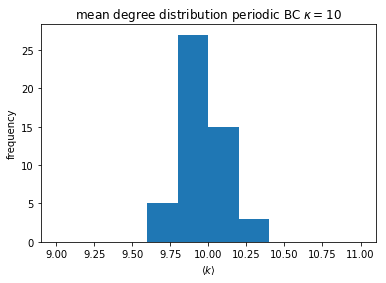

In [4]:
# k distribution
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mean_degrees = [sample.mean_degree() for sample in RGGp.samples]
print 'stddev: ' +str(np.std(mean_degrees))
n, bins, patches = ax1.hist(mean_degrees,10,range=(9,11))
ax1.set_title('mean degree distribution periodic BC $\\kappa=10$')
ax1.set_xlabel('$\\langle{k}\\rangle$')
ax1.set_ylabel('frequency')
fig1.savefig('./plots/histograms/k_50samples_'+ RGGp.get_param_string())

50
9.96216
0.057816640658
0.000474456256652


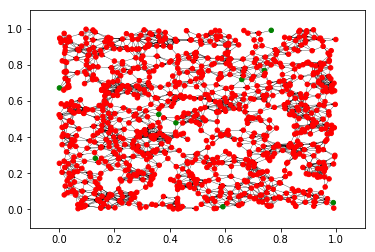

In [7]:
## SOLID  
RGGs = netgen.RGGEnsemble(kappa, n, d,boundary='s',num_radii=10)
RGGs.generate_samples(n=50)
RGGs.samples[0].plot_network(unmatched = RGGs.samples[0].find_unmatched())
print RGGs.get_num_samples()
print np.mean([sample.mean_degree() for sample in RGGs.samples])
print RGGs.radius
print RGGs.radius_std

stddev: 0.160061408216


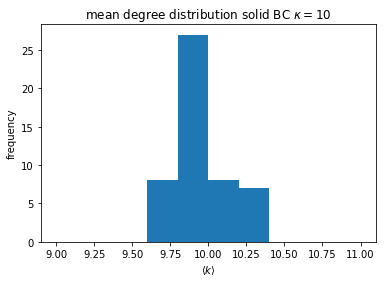

In [8]:
# k distribution
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mean_degrees = [sample.mean_degree() for sample in RGGs.samples]
print 'stddev: ' +str(np.std(mean_degrees))
n, bins, patches = ax3.hist([sample.mean_degree() for sample in RGGs.samples],10,range=(9,11),align='left')
ax3.set_title('mean degree distribution solid BC $\\kappa=10$')
ax3.set_xlabel('$\\langle{k}\\rangle$')
ax3.set_ylabel('frequency')
fig3.savefig('./plots/histograms/k_50samples_'+ RGGs.get_param_string())

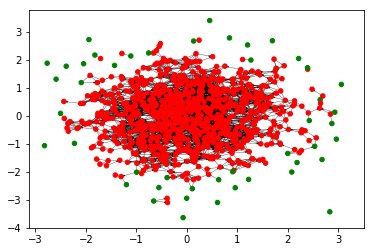

50
29.98936
0.349800610793
0.00782376389816


In [11]:
## GAUSSIAN  
RGGg = netgen.RGGEnsemble(30, n, d,boundary='g',num_radii=10)
RGGg.generate_samples(n=50)
RGGg.samples[0].plot_network(unmatched = RGGg.samples[0].find_unmatched(),show=True)
print RGGg.get_num_samples()
print np.mean([sample.mean_degree() for sample in RGGg.samples])
print RGGg.radius
print RGGg.radius_std

stddev: 1.04940725669


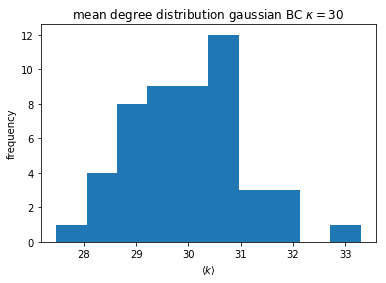

In [12]:
# k distribution
fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
mean_degrees = [sample.mean_degree() for sample in RGGg.samples]
print 'stddev: ' +str(np.std(mean_degrees))
n, bins, patches = ax5.hist([sample.mean_degree() for sample in RGGg.samples],10)
ax5.set_title('mean degree distribution gaussian BC $\\kappa=30$')
ax5.set_xlabel('$\\langle{k}\\rangle$')
ax5.set_ylabel('frequency')
fig5.savefig('./plots/histograms/k_50samples_'+ RGGg.get_param_string())

# kappa validation

plot $<k>$ for RGG vs ER on top of $y=x$ line

In [7]:
kappa_range = [1,3,5,8,10,15,20]
n = 100
boundary = 'g'
d_range = [2,3,6,9,15,25]
# approximate points of connection onset ~80%  
connection = {'s':12,'p':10,'g':15}

In [8]:
ER = ex.ERExperiment(kappa_range, n)
print ER.ensembles[0].get_num_samples()
mean_degree_listER, std_degree_listER, stddev_degree_listER = ER.find_degree_stats()

RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary,num_radii=10)
print RGG.ensembles[0].get_num_samples()
mean_degree_listRGG, std_degree_listRGG, stddev_degree_listRGG = RGG.find_degree_stats()

100


ValueError: Data does not exist for: RGG_K_8_N_100_d_2_BC_g_num_r_10

100
100


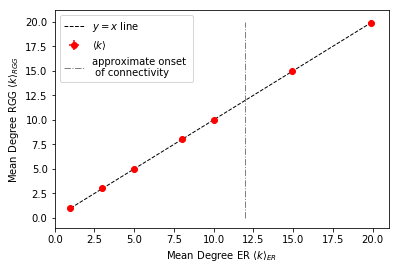

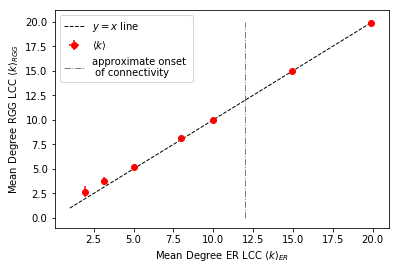

In [7]:
solidfig = plt.figure()
solidax = solidfig.add_subplot(1,1,1)

linehandle, = solidax.plot(kappa_range,kappa_range,'k--',linewidth=1)
kappahandle = solidax.errorbar(mean_degree_listER,mean_degree_listRGG,xerr=stddev_degree_listER,yerr=stddev_degree_listRGG,fmt='ro')

solidax.set_xlabel('Mean Degree ER $\\langle{k}\\rangle_{ER}$')
solidax.set_ylabel('Mean Degree RGG $\\langle{k}\\rangle_{RGG}$')

percline, = solidax.plot([connection[boundary],connection[boundary]],[0,20],color='gray',linestyle='-.',linewidth=1,alpha=1)

solidax.legend([linehandle,kappahandle,percline],['$y=x$ line','$\\langle{k}\\rangle$','approximate onset \n of connectivity'])
solidfig.savefig('./plots/kappa_v_kappa_N_'+str(n)+'_BC_'+str(boundary)+'.eps',dpi=800)

#######################  LCC  #############################

ER = ex.ERExperiment(kappa_range, n)
ER.to_LCC()
print ER.ensembles[0].get_num_samples()
mean_degree_list_ER_LCC, std_degree_list_ER_LCC, stddev_degree_list_ER_LCC = ER.find_degree_stats()

RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary,num_radii=10)
RGG.to_LCC()
print RGG.ensembles[0].get_num_samples()
mean_degree_list_RGG_LCC, std_degree_list_RGG_LCC, stddev_degree_list_RGG_LCC = RGG.find_degree_stats()

solidfig = plt.figure()
solidax = solidfig.add_subplot(1,1,1)

linehandle, = solidax.plot(kappa_range,kappa_range,'k--',linewidth=1)
kappahandle = solidax.errorbar(mean_degree_list_ER_LCC,mean_degree_list_RGG_LCC,xerr=stddev_degree_list_ER_LCC,yerr=stddev_degree_list_RGG_LCC,fmt='ro')

solidax.set_xlabel('Mean Degree ER LCC $\\langle{k}\\rangle_{ER}$')
solidax.set_ylabel('Mean Degree RGG LCC $\\langle{k}\\rangle_{RGG}$')

percline, = solidax.plot([connection[boundary],connection[boundary]],[0,20],color='gray',linestyle='-.',linewidth=1,alpha=1)

solidax.legend([linehandle,kappahandle,percline],['$y=x$ line','$\\langle{k}\\rangle$','approximate onset \n of connectivity'])

solidfig.savefig('./plots/kappa_v_kappa_LCC_N_'+str(n)+'_BC_'+str(boundary)+'.eps')

# number of stubs 

In [4]:
# find the number of degree-1 nodes in a graph 

def find_stubs(sample):
    
    A = sample.adjacency_dense.copy()
    stub_list = []
    
    for i in range(len(A)):
        if (np.sum(A[:,i]) + np.sum(A[i,:])) == 1:
            stub_list.append(i)
    
    return stub_list
        
def find_isolates(sample):
    
    A = sample.adjacency_dense.copy()
    stub_list = []
    
    for i in range(len(A)):
        if (np.sum(A[:,i]) + np.sum(A[i,:])) == 0:
            stub_list.append(i)
    
    return stub_list    

## testing

d = 2, num_stubs = 1
d = 3, num_stubs = 1
d = 6, num_stubs = 6
d = 9, num_stubs = 20
d = 15, num_stubs = 23
d = 25, num_stubs = 39


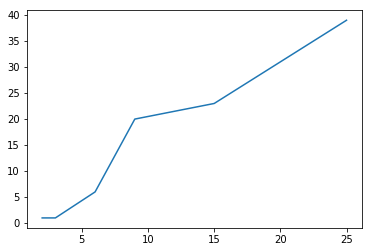

In [5]:
# make a sample and find the stubs 

kappa_range = [9,12]
kappa = 12
n_range = [100]
n = 1000
d_range = [2,3,6,9,15,25]
boundaries = ['s']#['s','p','g']
boundary = boundaries[0]
num_samples = 1

num_stubs = []
for d in d_range:
    RGG = ng.RGGEnsemble(kappa, n, d, boundary=boundary, num_radii=10)
    RGG.generate_samples(n=num_samples)
    num_stubs.append(len(find_stubs(RGG.samples[0])))
    print 'd = ' + str(d) + ', num_stubs = ' + str(len(find_stubs(RGG.samples[0])))
    # print find_stubs(RGG.samples[0])
    # RGG.samples[0].plot_network(label_nodes=True)
    # print find_isolates(RGG.samples[0])
    
plt.plot(d_range,num_stubs)

## plot

ER sim done mean stubs = 0.02 +/- 0.0140705294136
2th dimension done
3th dimension done
6th dimension done
9th dimension done
15th dimension done
25th dimension done
2th dimension done
3th dimension done
6th dimension done
9th dimension done
15th dimension done
25th dimension done


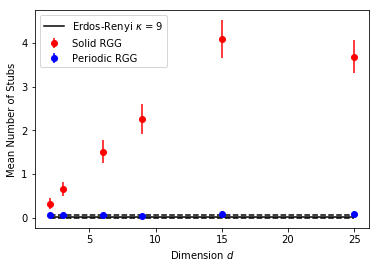

In [10]:
from scipy import stats 

# set up plots and axes 
stubfig = plt.figure(1)
stubax = stubfig.add_subplot(1,1,1)

# params
kappa_range = [9] #[9,10,12,15]
kappa = kappa_range[0]
kappa_range_fine = np.arange(8,22,.01)
n = 100
boundaries = ['s','p']
d_range = [2,3,6,9,15,25]

## ER 
stubhandles = []
stublabels = []

# ER data
ERE = ex.ERExperiment(kappa_range, n)

i = 0 
color = ['k','y','g','m']

# over kappas 
for ensemble in ERE.ensembles:
    num_stubs_sample = []
    # over samples 
    for sample in ensemble.samples:
        sample.to_LCC()
        num_stubs_sample.append(len(find_stubs(sample)))
    
    ERmean = np.mean(num_stubs_sample)
    ERerr = stats.sem(num_stubs_sample)

    ERline, = stubax.plot([min(d_range),max(d_range)],[ERmean,ERmean],color[i]+'-')
    stubax.plot([min(d_range),max(d_range)],[ERmean+2*ERerr,ERmean+2*ERerr],color[i]+'--')
    stubax.plot([min(d_range),max(d_range)],[ERmean-2*ERerr,ERmean-2*ERerr],color[i]+'--')
    stubhandles.append(ERline)
    stublabels.append('Erdos-Renyi $\kappa$ = '+str(ensemble.kappa))
    i+=1

    print 'ER sim done', 'mean stubs = ' + str(ERmean) + ' +/- ' + str(ERerr)
    

## RGG 
for boundary in boundaries:
    if boundary == 's':
        color = 'r'
        BC = 'Solid'
    elif boundary == 'p':
        color = 'b'
        BC = 'Periodic'

    num_stubs = []
    num_stubs_err = []
    for d in d_range:
        RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
        for ensemble in RGG.ensembles:
            num_stubs_sample = []
            for sample in ensemble.samples:
                sample.to_LCC()
                num_stubs_sample.append(len(find_stubs(sample)))
        num_stubs.append(np.mean(num_stubs_sample))
        num_stubs_err.append(2*stats.sem(num_stubs_sample))
        print str(d) +'th dimension done'

    stubhandle = stubax.errorbar(d_range,num_stubs,yerr=num_stubs_err,fmt=color+'o')
    stubhandles.append(stubhandle)
    stublabels.append(str(BC)+' RGG')

stubax.set_xlabel('Dimension $d$')
stubax.set_ylabel('Mean Number of Stubs')
stubax.legend(stubhandles,stublabels)

# ndkfig.tight_layout()
# gdfig.tight_layout()
stubfig.savefig('./plots/stubs_N_' + str(n) + '_kappa_' + str(kappa) + '.eps',dpi=800)